In [5]:
import visualization as vis
import nn
import dataset as dt
import numpy as np
import cv2
import matplotlib.pyplot as plt
import ipywidgets as widgets
from ipywidgets import interact, interactive, interact_manual




## Generated figures example

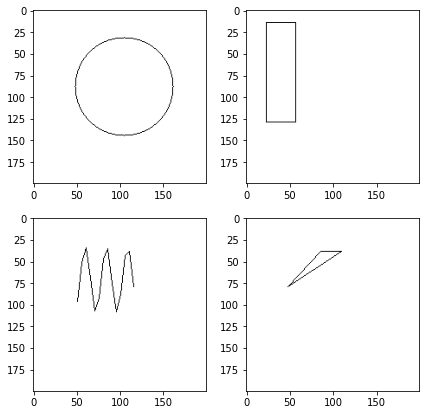

In [13]:
%matplotlib inline

fig = plt.figure(figsize=(7,7))
ax1 = fig.add_subplot(2,2,1)
ax1.imshow(vis.visualize_figure(dt.create_random_circle()),cmap='gray')
ax2 = fig.add_subplot(2,2,2)
ax2.imshow(vis.visualize_figure(dt.create_random_rectangle()), cmap='gray')
ax3 = fig.add_subplot(2,2,3)
ax3.imshow(vis.visualize_figure(dt.create_random_sine()),cmap='gray')
ax4 = fig.add_subplot(2,2,4)
ax4.imshow(vis.visualize_figure(dt.create_random_triangle()),cmap='gray')
                

## Control panel

In [8]:
num_classes_widget = widgets.BoundedIntText(value=2, min=2, max=4, step=1, description='num classes:')
num_epochs_widget = widgets.BoundedIntText(value=5, min=1, max=20, step=1, description='num epochs:')
learning_rate_widget = widgets.Dropdown(options=[1e-4, 1e-3, 1e-2], value=1e-3, description='learning rate:')
samples_per_class_widget = widgets.BoundedIntText(value=1000, min=750, max=5000, step=250, description="per class:")
train_btn = widgets.Button(description='Train', button_style='', icon='dumbbell')
create_btn = widgets.Button(description='Recreate', button_style='', icon='starfighter')   
test_btn = widgets.Button(description='Test', button_style='',  icon='vial')

In [9]:
architectures = []
@interact(x=(1, 3, 1))
def architecture(x=1):
    global architectures
    architectures = []
    for i in range(x):
        architectures.append(widgets.BoundedIntText(value=500, min=100, max=1000, step=100, description='hidden %d' % (i + 1)))
    ui = widgets.HBox(architectures)
    display(ui)
                             
inputs_ui = widgets.VBox([num_classes_widget, num_epochs_widget, learning_rate_widget])
ui = widgets.HBox([inputs_ui, widgets.VBox([samples_per_class_widget, widgets.HBox([create_btn, train_btn, test_btn])])])
                   
display(ui)

interactive(children=(IntSlider(value=1, description='x', max=3, min=1), Output()), _dom_classes=('widget-inte…

## Inference